Desafio Técnico Sigalei

O racismo estrutural é um problema histórico que foi evidenciado neste ano de 2020 por diversos fatos marcantes. Entre eles, o crescimento exponencial do movimento Black Lives Matter (Vidas negras importam), que expandiu pelo mundo todo, inclusive no Brasil.

Para combater o racismo, existem diversas iniciativas, dentre elas, as cotas raciais. As cotas aceleram o processo de permitir o acesso a oportunidades que devido, à estrutura sistemática, é distante da realidade de grande parte da população negra do país, que constitui cerca de 56% dos brasileiros, segundo o IBGE.

As primeiras cotas universitárias foram implementadas ainda no governo Lula em 2009, ou seja, há mais de 10 anos, sendo que, ao longo desses anos e das mudanças de governo, a adesão de instituições públicas de ensino superior a esse sistema também se modificou.

O objetivo desse desafio é coletar, transformar e armazenar os dados do censo universitário desde 2009 até 2019 em uma base da sua preferência para analisar os impactos dessa política pública no perfil do universitário brasileiro ao longo dos últimos 11 anos.

Objetivos:
Coletar e armazenar os dados do censo universitário em uma base da sua preferência;
Analisar o impacto da presença de pretos e pardos no curso superior

Entregáveis que esperamos
- Código gerado para realizar a análise no Github dos dados desde 2009
- Análise gerada. Pode ser pdf, página html ou um notebook (preferível)

Requisitos
Todo o código deve ser desenvolvido em python

Prazo
23h do dia 29/11/2020

O objetivo desse desafio é verificar os seus conhecimentos em python, mas também contribuir com o debate sobre as políticas públicas contra o racismo estrutural. Dessa forma, os resultados gerados, com a sua permissão e devidos créditos, serão compilados, analisados e compartilhados pela equipe da Sigalei publicamente.

Algumas análise que podem ser interessantes
- Total de negros matriculados em universidades
- Total de negros matriculados em universidades públicas
- Total e proporção de negros matriculados por tipo de curso em universidades públicas

Dados
- Os dados que você irá utilizar são os microdados disponibilizados nesse site:
https://www.gov.br/inep/pt-br/areas-de-atuacao/pesquisas-estatisticas-e-indicadores/censo-da-educacao-superior/resultados?_authenticator=73b6b0e03f10cadf5ec8ab8e09e6be4f931e571f

Alguns links que podem te ajudar

https://github.com/search?q=censo+educa%C3%A7%C3%A3o+superior

In [5]:
import pandas as pd
from glob import glob
import os
from dask import dataframe as dd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Markdown as md
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.max_seq_items = 2000

In [6]:
#win
#dir_raiz = r'D:\microdados_educacao_superior_2019\dados'

# Selecionando os diretorios para análise dos dataframes

In [7]:
#ubuntu
dir_2009 = '/media/leandro/B696BB2796BAE6D1/Users/eppmi/Desktop/educacao superior/microdados_censo_superior_2009/2009/DADOS/'
dir_2010 = '/media/leandro/B696BB2796BAE6D1/Users/eppmi/Desktop/educacao superior/microdados_censo_superior_2010/DADOS/'
dir_2011 = '/media/leandro/B696BB2796BAE6D1/Users/eppmi/Desktop/educacao superior/microdados_censo_superior_2011/2011/DADOS/'
dir_2012 = '/media/leandro/B696BB2796BAE6D1/Users/eppmi/Desktop/educacao superior/microdados_censo_superior_2012/2012/DADOS/'
dir_2013 = '/media/leandro/B696BB2796BAE6D1/Users/eppmi/Desktop/educacao superior/microdados_censo_superior_2013/2013/DADOS/'
dir_2014 = '/media/leandro/B696BB2796BAE6D1/Users/eppmi/Desktop/educacao superior/microdados_censo_superior_2014/2014/DADOS/'
dir_2015 = '/media/leandro/B696BB2796BAE6D1/Users/eppmi/Desktop/educacao superior/microdados_censo_superior_2015/DADOS/'
dir_2016 = '/media/leandro/B696BB2796BAE6D1/Users/eppmi/Desktop/educacao superior/microdados_censo_superior_2016/DADOS/'
dir_2017 = '/media/leandro/B696BB2796BAE6D1/Users/eppmi/Desktop/educacao superior/microdados_educacao_superior_2017/microdados_censo_superior_2017/DADOS/'
dir_2018 = '/media/leandro/B696BB2796BAE6D1/Users/eppmi/Desktop/educacao superior/microdados_educacao_superior_2018/microdados_ed_superior_2018/dados/'
dir_2019 = '/media/leandro/B696BB2796BAE6D1/Users/eppmi/Desktop/educacao superior/microdados_educacao_superior_2019/microdados_censo_superior_2019/dados/'


In [8]:
os.listdir(dir_2009)

['DM_ALUNO.CSV',
 'DM_CURSO.CSV',
 'DM_DOCENTE.CSV',
 'DM_IES.CSV',
 'DM_UNIDADE_FUNCIONAMENTO.CSV',
 'DM_VAGAS_INSCRITOS_EAD.CSV',
 'md5_microdados_ed_superior_2009.txt']

# Como os dataframes são grandes e parte das colunas não interessa à análise procederemos à limpeza

## Nem todas as colunas são iguais para todos os anos, assim nesse primeira parte verificarei quais são as colunas de interesse para cada ano

In [9]:
df = pd.read_csv(dir_2009+"DM_ALUNO.CSV", sep="|", encoding="latin", nrows=500)

In [10]:
df.columns

Index(['CO_IES', 'NO_IES', 'CO_CATEGORIA_ADMINISTRATIVA',
       'DS_CATEGORIA_ADMINISTRATIVA', 'CO_ORGANIZACAO_ACADEMICA',
       'NO_ORGANIZACAO_ACADEMICA', 'CO_CURSO', 'NO_CURSO',
       'CO_NIVEL_ACADEMICO', 'CO_MODALIDADE_ENSINO', 'CO_GRAU_ACADEMICO',
       'CO_VINCULO_ALUNO_CURSO', 'CO_ALUNO', 'CO_ALUNO_SITUACAO',
       'IN_ING_PROCESSO_SELETIVO', 'IN_ING_VESTIBULAR', 'IN_ING_ENEM',
       'IN_ING_OUTRA_FORMA_SELECAO', 'IN_ING_PROCESSO_OUTRAS_FORMAS',
       'IN_ING_CONVENIO_PECG', 'IN_ING_OUTRAS_FORMAS_INGRESSO',
       'IN_APOIO_SOCIAL', 'IN_APOIO_ALIMENTACAO', 'IN_APOIO_MORADIA',
       'IN_APOIO_TRANSPORTE', 'IN_APOIO_MATERIAL_DIDATICO',
       'IN_APOIO_BOLSA_PERMANENCIA', 'IN_APOIO_BOLSA_TRABALHO',
       'IN_ALUNO_DEFICIENCIA', 'IN_CEGUEIRA', 'IN_BAIXA_VISAO', 'IN_SURDEZ',
       'IN_DEF_AUDITIVA', 'IN_DEF_FISICA', 'IN_SURDOCEGUEIRA',
       'IN_DEF_MULTIPLA', 'IN_DEF_MENTAL', 'IN_RESERVA_VAGAS',
       'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_ETNICO',
       'IN_RESERVA

In [11]:
lista_col_2009 = ['CO_CATEGORIA_ADMINISTRATIVA', 'CO_ORGANIZACAO_ACADEMICA',
       'NO_CURSO','CO_GRAU_ACADEMICO',
       'IN_ING_PROCESSO_SELETIVO', 'IN_ING_VESTIBULAR', 'IN_ING_ENEM',
       'IN_ING_OUTRA_FORMA_SELECAO', 'IN_ING_PROCESSO_OUTRAS_FORMAS',
       'IN_ING_CONVENIO_PECG', 'IN_ING_OUTRAS_FORMAS_INGRESSO',
       'IN_APOIO_SOCIAL', 'IN_APOIO_ALIMENTACAO', 'IN_APOIO_MORADIA',
       'IN_APOIO_TRANSPORTE', 'IN_APOIO_MATERIAL_DIDATICO',
       'IN_APOIO_BOLSA_PERMANENCIA', 'IN_APOIO_BOLSA_TRABALHO',
       'IN_ALUNO_DEFICIENCIA',  'IN_RESERVA_VAGAS',
       'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_ETNICO',
       'IN_RESERVA_DEFICIENCIA', 'IN_RESERVA_RENDA_FAMILIAR',
       'IN_RESERVA_OUTROS',
       'IN_FINANC_ESTUDANTIL', 'IN_FINANC_EXTERNAS',
       'IN_FINANC_EXTERNAS_REEMB', 'IN_FINANC_IES', 'IN_FINANC_IES_REEMB',
       'IN_FINANC_MUNICIPAL', 'IN_FINANC_MUNICIPAL_REEMB',
       'IN_FINANC_ESTADUAL', 'IN_FINANC_ESTADUAL_REEMB', 'IN_FINANC_OUTROS',
       'IN_FINANC_OUTROS_REEMB', 'IN_PROUNI_INTEGRAL', 'IN_PROUNI_PARCIAL',
       'IN_FIES', 'IN_SEXO_ALUNO', 'CO_COR_RACA_ALUNO',
       'IN_INGRESSO']

In [12]:
os.listdir(dir_2010)

['DM_ALUNO.CSV',
 'DM_CURSO.CSV',
 'DM_DOCENTE.CSV',
 'DM_IES.CSV',
 'DM_LOCAL_OFERTA.CSV',
 'md5_microdados_ed_superior_2010.txt']

In [13]:
df2= pd.read_csv(dir_2010+"DM_ALUNO.CSV", sep="|", encoding="latin", nrows=500)

In [14]:
df2.columns

Index(['CO_IES', 'NO_IES', 'CO_CATEGORIA_ADMINISTRATIVA',
       'DS_CATEGORIA_ADMINISTRATIVA', 'CO_ORGANIZACAO_ACADEMICA',
       'DS_ORGANIZACAO_ACADEMICA', 'CO_CURSO', 'NO_CURSO', 'CO_GRAU_ACADEMICO',
       'CO_MODALIDADE_ENSINO', 'CO_NIVEL_ACADEMICO', 'CO_ALUNO_CURSO',
       'CO_ALUNO', 'CO_COR_RACA_ALUNO', 'DS_COR_RACA_ALUNO', 'IN_SEXO_ALUNO',
       'DS_SEXO_ALUNO', 'NU_ANO_ALUNO_NASC', 'NU_DIA_ALUNO_NASC',
       'NU_MES_ALUNO_NASC', 'NU_IDADE_ALUNO', 'CO_NACIONALIDADE_ALUNO',
       'CO_PAIS_ORIGEM_ALUNO', 'CO_UF_NASCIMENTO', 'CO_MUNICIPIO_NASCIMENTO',
       'CO_ALUNO_SITUACAO', 'IN_ALUNO_DEFICIENCIA', 'IN_DEF_AUDITIVA',
       'IN_DEF_FISICA', 'IN_DEF_INTELECTUAL', 'IN_DEF_MULTIPLA',
       'IN_DEF_SURDEZ', 'IN_DEF_SURDOCEGUEIRA', 'IN_DEF_BAIXA_VISAO',
       'IN_DEF_CEGUEIRA', 'DT_INGRESSO_CURSO', 'IN_ATIVIDADE_COMPLEMENTAR',
       'IN_RESERVA_VAGAS', 'IN_FINANC_ESTUDANTIL', 'IN_APOIO_SOCIAL',
       'CO_CURSO_POLO', 'CO_TURNO_ALUNO', 'IN_ING_VESTIBULAR', 'IN_ING_ENEM',
 

In [15]:
lista_col_2010 = ['CO_CATEGORIA_ADMINISTRATIVA',
       'CO_ORGANIZACAO_ACADEMICA',
       'NO_CURSO', 'CO_GRAU_ACADEMICO',
       'CO_COR_RACA_ALUNO', 'IN_SEXO_ALUNO',
       'IN_ALUNO_DEFICIENCIA', 
       'IN_RESERVA_VAGAS', 'IN_FINANC_ESTUDANTIL', 'IN_APOIO_SOCIAL',
       'IN_ING_VESTIBULAR', 'IN_ING_ENEM',
       'IN_ING_CONVENIO_PECG',
       'IN_ING_OUTRA_FORMA', 'IN_RESERVA_ETNICO', 'IN_RESERVA_DEFICIENCIA',
       'IN_RESERVA_ENSINO_PUBLICO', 'IN_RESERVA_RENDA_FAMILIAR',
       'IN_RESERVA_OUTROS', 'IN_FIN_REEMB_FIES', 'IN_FIN_REEMB_ESTADUAL',
       'IN_FIN_REEMB_MUNICIPAL', 'IN_FIN_REEMB_PROG_IES',
       'IN_FIN_REEMB_ENT_EXTERNA', 'IN_FIN_REEMB_OUTRA',
       'IN_FIN_NAOREEMB_PROUNI_INTEGR', 'IN_FIN_NAOREEMB_PROUNI_PARCIAL',
       'IN_FIN_NAOREEMB_ESTADUAL', 'IN_FIN_NAOREEMB_MUNICIPAL',
       'IN_FIN_NAOREEMB_PROG_IES', 'IN_FIN_NAOREEMB_ENT_EXTERNA',
       'IN_FIN_NAOREEMB_OUTRA', 'IN_INGRESSO']

In [16]:
lista_col_2011 = lista_col_2010.copy()
lista_col_2011.remove('IN_INGRESSO')
lista_col_2011.append("IN_INGRESSO_TOTAL")
df3= pd.read_csv(dir_2011+"DM_ALUNO.CSV", sep="|", encoding="latin", nrows=500, usecols=lista_col_2011)

In [17]:
lista_col_2012 = lista_col_2011.copy()
lista_col_2012.remove('IN_ALUNO_DEFICIENCIA')
lista_col_2012.append("IN_ALUNO_DEF_TGD_SUPER")

In [18]:
df4= pd.read_csv(dir_2012+"DM_ALUNO.CSV", sep="|", encoding="latin", nrows=500, usecols=lista_col_2012)

In [19]:
lista_col_2013 = lista_col_2012.copy()
lista_col_2013.remove('IN_FIN_NAOREEMB_OUTRA')
lista_col_2013.remove('IN_FIN_REEMB_OUTRA')


In [20]:
df5= pd.read_csv(dir_2013+"DM_ALUNO.CSV", sep="|", encoding="latin", nrows=500, usecols=lista_col_2013)

In [21]:
lista_col_2014 = lista_col_2013.copy()
lista_col_2014.remove('IN_ING_OUTRA_FORMA')
lista_col_2014.remove('IN_RESERVA_OUTROS')
lista_col_2014.append('IN_RESERVA_OUTRA')

In [22]:
df6= pd.read_csv(dir_2014+"DM_ALUNO.CSV", sep="|", encoding="latin", nrows=500, usecols=lista_col_2014)

In [23]:
df7= pd.read_csv(dir_2015+"DM_ALUNO.CSV", sep="|", encoding="latin", nrows=500, usecols=lista_col_2014)

In [24]:
df8= pd.read_csv(dir_2016+"DM_ALUNO.CSV", sep="|", encoding="latin", nrows=500, usecols=lista_col_2014)

In [25]:
lista_col_2017 = lista_col_2014.copy()
#lista_col_2011.remove('IN_INGRESSO')
lista_col_2017 = lista_col_2017.append("TP_COR_RACA")

In [26]:
df9= pd.read_csv(dir_2017+"DM_ALUNO.CSV", sep="|", encoding="latin", nrows=500, usecols=lista_col_2017)

In [27]:
df10 = pd.read_csv(dir_2018+"DM_ALUNO.CSV", sep="|", encoding="latin", nrows=500, usecols=lista_col_2017)

In [28]:
df11 = pd.read_csv(dir_2019+"SUP_ALUNO_2019.CSV", sep="|", encoding="latin", nrows=500, usecols=lista_col_2017)

## Com as colunas selecionadas podemos proceder ao upload dos Dataframes

Como os dataframes são grandes utilizarei o Dask para leitura

In [29]:
df_2009 = dd.read_csv(dir_2009+"DM_ALUNO.CSV", sep="|", encoding="latin", usecols=lista_col_2009)

In [30]:
df_2010= dd.read_csv(dir_2010+"DM_ALUNO.CSV", sep="|", encoding="latin", usecols=lista_col_2010, dtype={'CO_GRAU_ACADEMICO': 'float64'}
)

In [31]:
df_2011= dd.read_csv(dir_2011+"DM_ALUNO.CSV", sep="|", encoding="latin", usecols=lista_col_2011)

In [32]:
df_2012= dd.read_csv(dir_2012+"DM_ALUNO.CSV", sep="|", encoding="latin", usecols=lista_col_2012)

In [33]:
df_2013= dd.read_csv(dir_2013+"DM_ALUNO.CSV", sep="|", encoding="latin", usecols=lista_col_2013,dtype={'CO_GRAU_ACADEMICO': 'float64'})

In [34]:
df_2014= dd.read_csv(dir_2014+"DM_ALUNO.CSV", sep="|", encoding="latin", usecols=lista_col_2014,dtype={'CO_GRAU_ACADEMICO': 'float64'}
)

In [35]:
df_2015= dd.read_csv(dir_2015+"DM_ALUNO.CSV", sep="|", encoding="latin", usecols=lista_col_2014,dtype={'CO_GRAU_ACADEMICO': 'float64'})

In [36]:
df_2016= dd.read_csv(dir_2016+"DM_ALUNO.CSV", sep="|", encoding="latin", usecols=lista_col_2014, dtype={'CO_GRAU_ACADEMICO': 'float64',
       'IN_ING_CONVENIO_PECG': 'float64'})

In [37]:
df_2017= dd.read_csv(dir_2017+"DM_ALUNO.CSV", sep="|", encoding="latin", usecols=lista_col_2017,dtype={'CO_OCDE_AREA_DETALHADA': 'float64',
       'CO_OCDE_AREA_ESPECIFICA': 'float64',
       'CO_OCDE_AREA_GERAL': 'float64',
       'TP_GRAU_ACADEMICO': 'float64',
       'TP_TURNO': 'float64'})

In [38]:
df_2018= dd.read_csv(dir_2018+"DM_ALUNO.CSV", sep="|", encoding="latin", usecols=lista_col_2017,assume_missing=True, dtype={'CO_PAIS_ORIGEM': 'float64',
       'IN_APOIO_SOCIAL': 'float64',
       'IN_ATIVIDADE_EXTRACURRICULAR': 'float64',
       'IN_CONCLUINTE': 'float64',
       'IN_DEFICIENCIA': 'float64',
       'IN_INGRESSO_AVALIACAO_SERIADA': 'float64',
       'IN_INGRESSO_CONVENIO_PECG': 'float64',
       'IN_INGRESSO_DECISAO_JUDICIAL': 'float64',
       'IN_INGRESSO_EGRESSO': 'float64',
       'IN_INGRESSO_ENEM': 'float64',
       'IN_INGRESSO_SELECAO_SIMPLIFICA': 'float64',
       'IN_INGRESSO_TOTAL': 'float64',
       'IN_INGRESSO_TRANSF_EXOFFICIO': 'float64',
       'IN_INGRESSO_VAGA_NOVA': 'float64',
       'IN_INGRESSO_VAGA_PROG_ESPECIAL': 'float64',
       'IN_INGRESSO_VAGA_REMANESC': 'float64',
       'IN_INGRESSO_VESTIBULAR': 'float64',
       'IN_MATRICULA': 'float64',
       'IN_RESERVA_VAGAS': 'float64',
       'NU_ANO_INGRESSO': 'float64',
       'NU_IDADE': 'float64',
       'QT_CARGA_HORARIA_INTEG': 'float64',
       'QT_CARGA_HORARIA_TOTAL': 'float64',
       'TP_ESCOLA_CONCLUSAO_ENS_MEDIO': 'float64',
       'TP_NACIONALIDADE': 'float64',
       'TP_SEMESTRE_REFERENCIA': 'float64',
       'TP_SITUACAO': 'float64'}
)

In [39]:
df_2019= dd.read_csv(dir_2019+"SUP_ALUNO_2019.CSV", sep="|", encoding="latin", usecols=lista_col_2017, dtype={'TP_GRAU_ACADEMICO': 'float64',
       'TP_TURNO': 'float64'}
)

## Separando os dataframes apenas para aqueles que se declararam pretos ou pardos

In [40]:
df_2009_afro = df_2009[df_2009['CO_COR_RACA_ALUNO'].isin([3, 2])]

In [41]:
df_2010_afro = df_2010[df_2010['CO_COR_RACA_ALUNO'].isin([3, 2])]
df_2011_afro = df_2011[df_2011['CO_COR_RACA_ALUNO'].isin([3, 2])]
df_2012_afro = df_2012[df_2012['CO_COR_RACA_ALUNO'].isin([3, 2])]
df_2013_afro = df_2013[df_2013['CO_COR_RACA_ALUNO'].isin([3, 2])]
df_2014_afro = df_2014[df_2014['CO_COR_RACA_ALUNO'].isin([3, 2])]
df_2015_afro = df_2015[df_2015['CO_COR_RACA_ALUNO'].isin([3, 2])]
df_2016_afro = df_2016[df_2016['CO_COR_RACA_ALUNO'].isin([3, 2])]

In [42]:
df_2017_afro = df_2017[df_2017['TP_COR_RACA'].isin([3, 2])]

In [43]:
df_2018_afro = df_2018[df_2018['TP_COR_RACA'].isin([3, 2])]

In [44]:
df_2019_afro = df_2019[df_2019['TP_COR_RACA'].isin([3, 2])]

# Inicio das análises

In [45]:
#Lista dos anos
anos = [2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]

## Primeiramente analisarei os dados absolutos

In [46]:
# Lista com os tamanhos de cada dataframe com afrodescendentes

afro = [len(df_2009_afro.index),len(df_2010_afro.index),len(df_2011_afro.index),len(df_2012_afro.index),
        len(df_2013_afro.index),len(df_2014_afro.index),len(df_2015_afro.index),len(df_2016_afro.index),
        len(df_2017_afro.index),len(df_2018_afro.index),len(df_2019_afro.index)]

/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


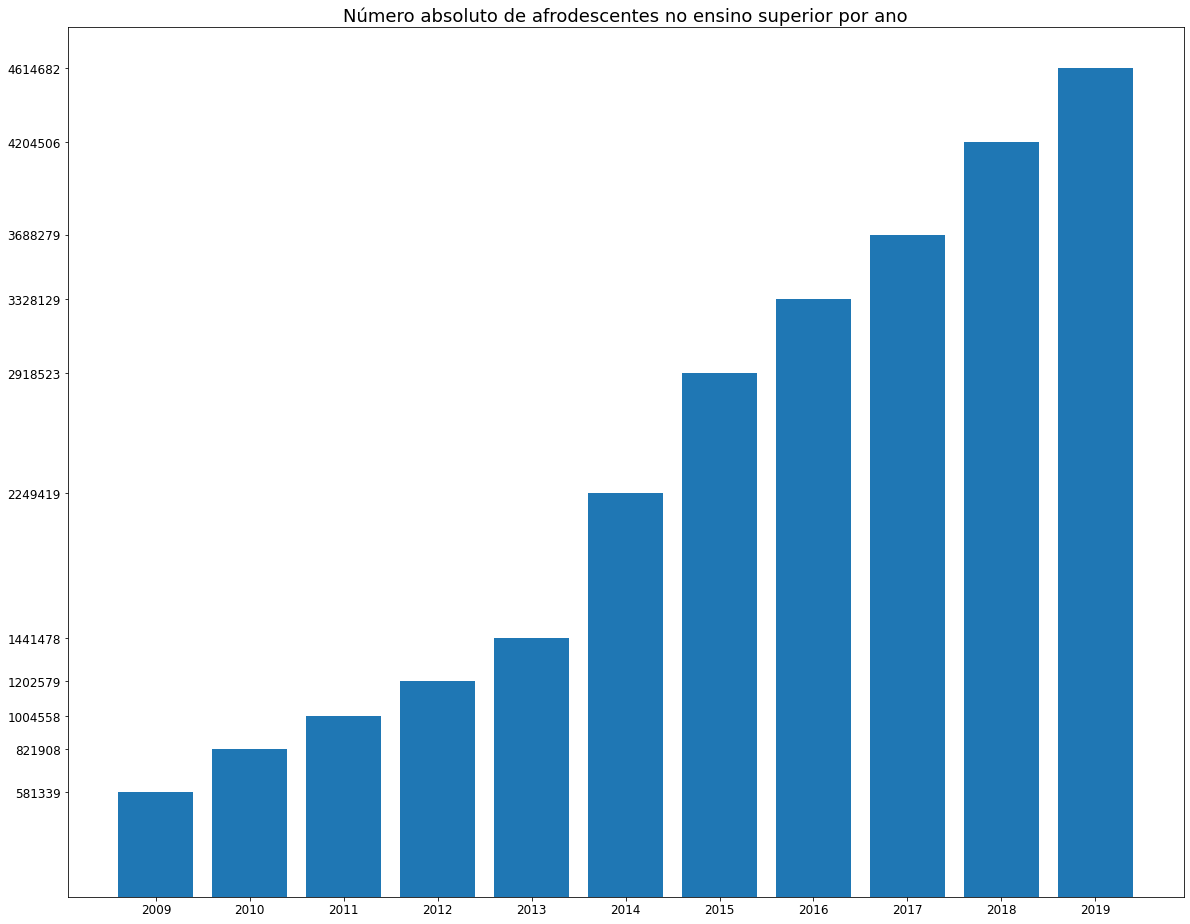

In [47]:
fig, ax = plt.subplots(figsize=(20,16))
plt.title("Número absoluto de afrodescentes no ensino superior por ano", fontsize= 18)
plt.xticks(anos, fontsize =12)
plt.yticks(afro, fontsize=12)
ax.yaxis.get_major_formatter().set_scientific(False)
plt.bar(anos,afro)
plt.show()

## Como podemos ver há uma crecente no número de alunos afrodescendentes em todo o período.
## Esse crescimento pode se dever tanto ao crescimento de vagas quanto à maior proporção de afrodescendentes no ensino superior, vamos analisar:

In [48]:
# Tamanho dos dataframes sem filtro
totais = [len(df_2009),len(df_2010),len(df_2011),len(df_2012),
        len(df_2013),len(df_2014),len(df_2015),len(df_2016),
        len(df_2017),len(df_2018),len(df_2019)]

/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


In [49]:
# Criando uma lista com os percentis a partir da lista com os totais e com os afrodescendentes
percentis = [(a/b)*100 for a,b in zip(afro,totais)]

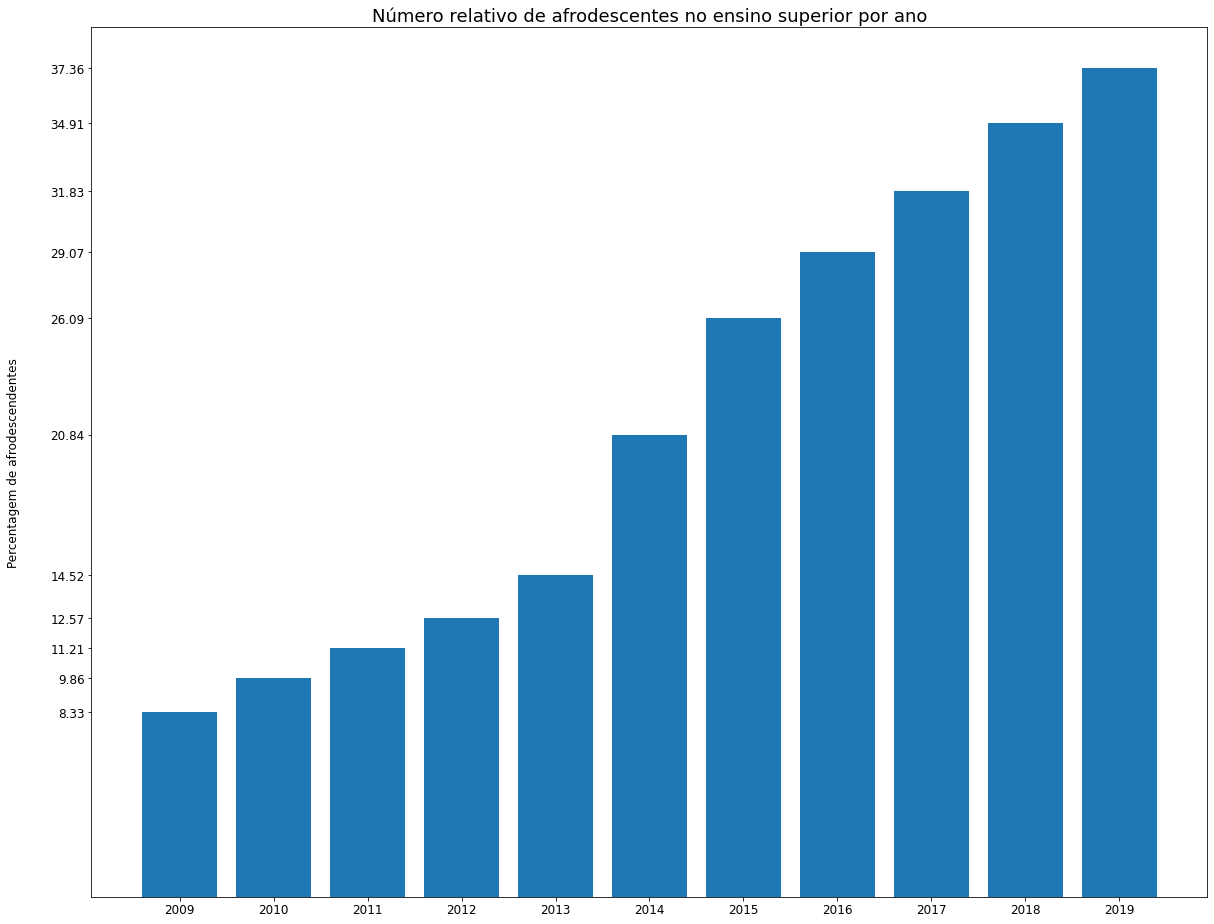

In [50]:
fig, ax = plt.subplots(figsize=(20,16))
plt.title("Número relativo de afrodescentes no ensino superior por ano", fontsize= 18)
plt.xticks(anos, fontsize =12)
plt.ylabel("Percentagem de afrodescendentes", fontsize=12, labelpad=30)
plt.yticks(percentis, fontsize=12)
plt.bar(anos,percentis)
plt.show()

# Podemos verificar que realmente há uma maior concentração de alunos afrodescendentes no ensino superior. Esse movimento é crescente ano a ano e atinge o pico de 37,36% em 2019.

# Vamos ver o número absoluto desses alunos.

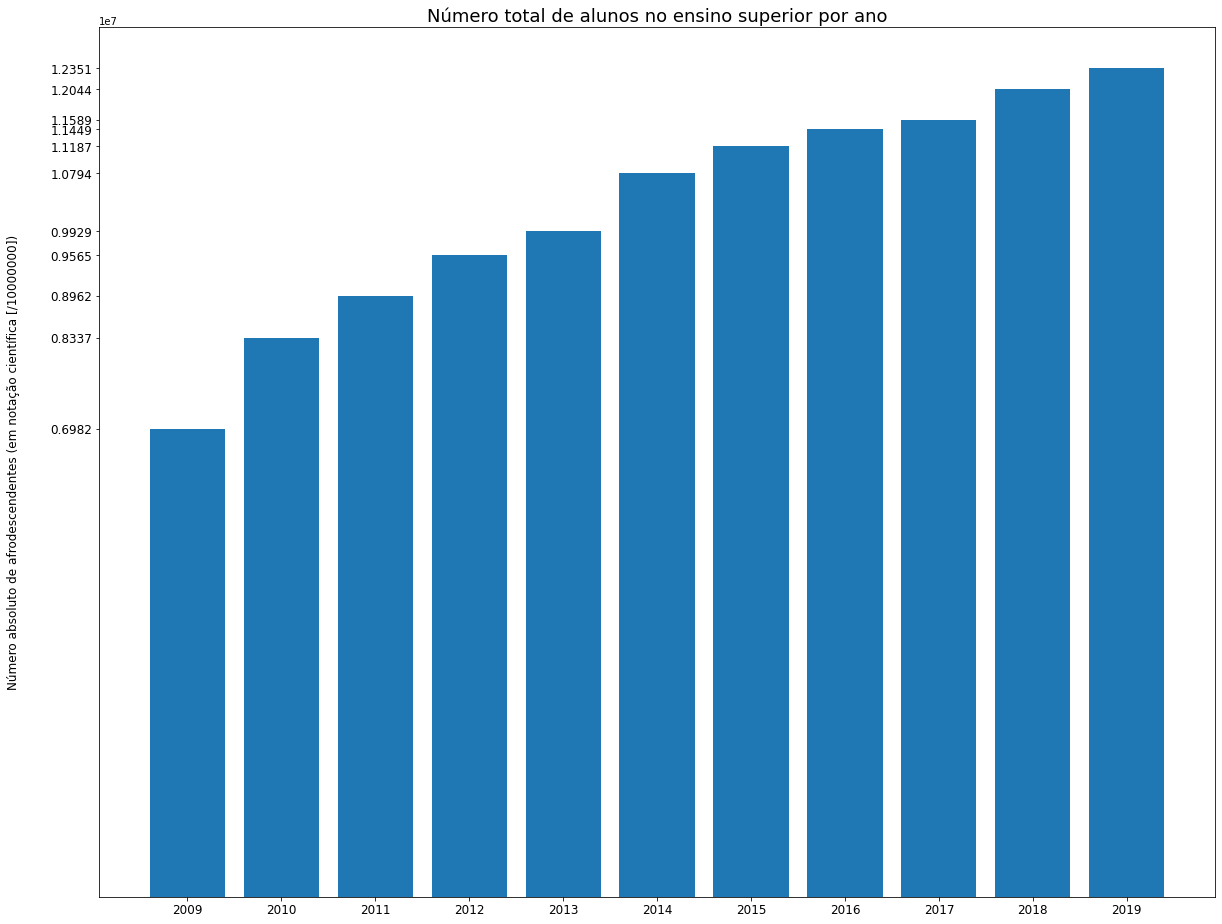

In [51]:
fig, ax = plt.subplots(figsize=(20,16))
plt.title("Número total de alunos no ensino superior por ano", fontsize= 18)
plt.xticks(anos, fontsize =12)
plt.yticks(totais, fontsize=12)
plt.ylabel("Número absoluto de afrodescendentes (em notação científica [/10000000])", fontsize=12, labelpad=30)
plt.bar(anos,totais)
plt.show()

In [52]:
# Tabela com o resumo das análises
pd.DataFrame(list(zip(afro,totais,percentis)) ,index=anos,columns =['afro', 'total', "percentagem"] )

,afro,total,percentagem
2009,581339,6982018,8.326232
2010,821908,8337219,9.858299
2011,1004558,8961724,11.209428
2012,1202579,9565483,12.572068
2013,1441478,9929289,14.517434
2014,2249419,10793935,20.839657
2015,2918523,11187296,26.087832
2016,3328129,11449222,29.068604
2017,3688279,11589194,31.825155
2018,4204506,12043993,34.909569


# Há uma entrada constante de alunos afrodescendentes no ensino superior. Mas esses alunos estão entrando em universidades públicas ou privadas?

## Primeiramente separarei os dataframes com afrodescendentes em universidades públicas e privadas. Após isso criarei uma lista com os totais para cada uma dessas categorias.

### Dataframe universidades públicas

In [53]:
df_2009_afro_pub = df_2009_afro[df_2009_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([3, 2,1])]

In [54]:
df_2010_afro_pub = df_2010_afro[df_2010_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([3, 2,1])]

In [55]:
df_2011_afro_pub = df_2011_afro[df_2011_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([3, 2,1])]

In [56]:
df_2012_afro_pub = df_2012_afro[df_2012_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([3, 2,1])]

In [57]:
df_2013_afro_pub = df_2013_afro[df_2013_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([3, 2,1])]

In [58]:
df_2014_afro_pub = df_2014_afro[df_2014_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([3, 2,1])]

In [59]:
df_2015_afro_pub = df_2015_afro[df_2015_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([3, 2,1])]

In [60]:
df_2016_afro_pub = df_2016_afro[df_2016_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([3, 2,1])]

In [61]:
df_2017_afro_pub = df_2017_afro[df_2017_afro['TP_CATEGORIA_ADMINISTRATIVA'].isin([3, 2,1])]
df_2018_afro_pub = df_2018_afro[df_2018_afro['TP_CATEGORIA_ADMINISTRATIVA'].isin([3, 2,1])]
df_2019_afro_pub = df_2019_afro[df_2019_afro['TP_CATEGORIA_ADMINISTRATIVA'].isin([3, 2,1])]

In [62]:
afro_pub = [len(df_2009_afro_pub.index),len(df_2010_afro_pub.index),len(df_2011_afro_pub.index),
            len(df_2012_afro_pub.index),len(df_2013_afro_pub.index),len(df_2014_afro_pub.index),
            len(df_2015_afro_pub.index),len(df_2016_afro_pub.index),
        len(df_2017_afro_pub.index),len(df_2018_afro_pub.index),len(df_2019_afro_pub.index)]

/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


### Dataframe universidades privadas

In [63]:
df_2009_afro_pri = df_2009_afro[df_2009_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([4,5,6,7,8,9])]

In [64]:
df_2010_afro_pri = df_2010_afro[df_2010_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([4,5,6,7,8,9])]

df_2011_afro_pri = df_2011_afro[df_2011_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([4,5,6,7,8,9])]

df_2012_afro_pri = df_2012_afro[df_2012_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([4,5,6,7,8,9])]

df_2013_afro_pri = df_2013_afro[df_2013_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([4,5,6,7,8,9])]

df_2014_afro_pri = df_2014_afro[df_2014_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([4,5,6,7,8,9])]

df_2015_afro_pri = df_2015_afro[df_2015_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([4,5,6,7,8,9])]

df_2016_afro_pri = df_2016_afro[df_2016_afro['CO_CATEGORIA_ADMINISTRATIVA'].isin([4,5,6,7,8,9])]

In [65]:
df_2017_afro_pri = df_2017_afro[df_2017_afro['TP_CATEGORIA_ADMINISTRATIVA'].isin([4,5,6,7,8,9])]
df_2018_afro_pri = df_2018_afro[df_2018_afro['TP_CATEGORIA_ADMINISTRATIVA'].isin([4,5,6,7,8,9])]
df_2019_afro_pri = df_2019_afro[df_2019_afro['TP_CATEGORIA_ADMINISTRATIVA'].isin([4,5,6,7,8,9])]

In [66]:
afro_pri = [len(df_2009_afro_pri.index),len(df_2010_afro_pri.index),len(df_2011_afro_pri.index),
            len(df_2012_afro_pri.index),len(df_2013_afro_pri.index),len(df_2014_afro_pri.index),
            len(df_2015_afro_pri.index),len(df_2016_afro_pri.index),
        len(df_2017_afro_pri.index),len(df_2018_afro_pri.index),len(df_2019_afro_pri.index)]

/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


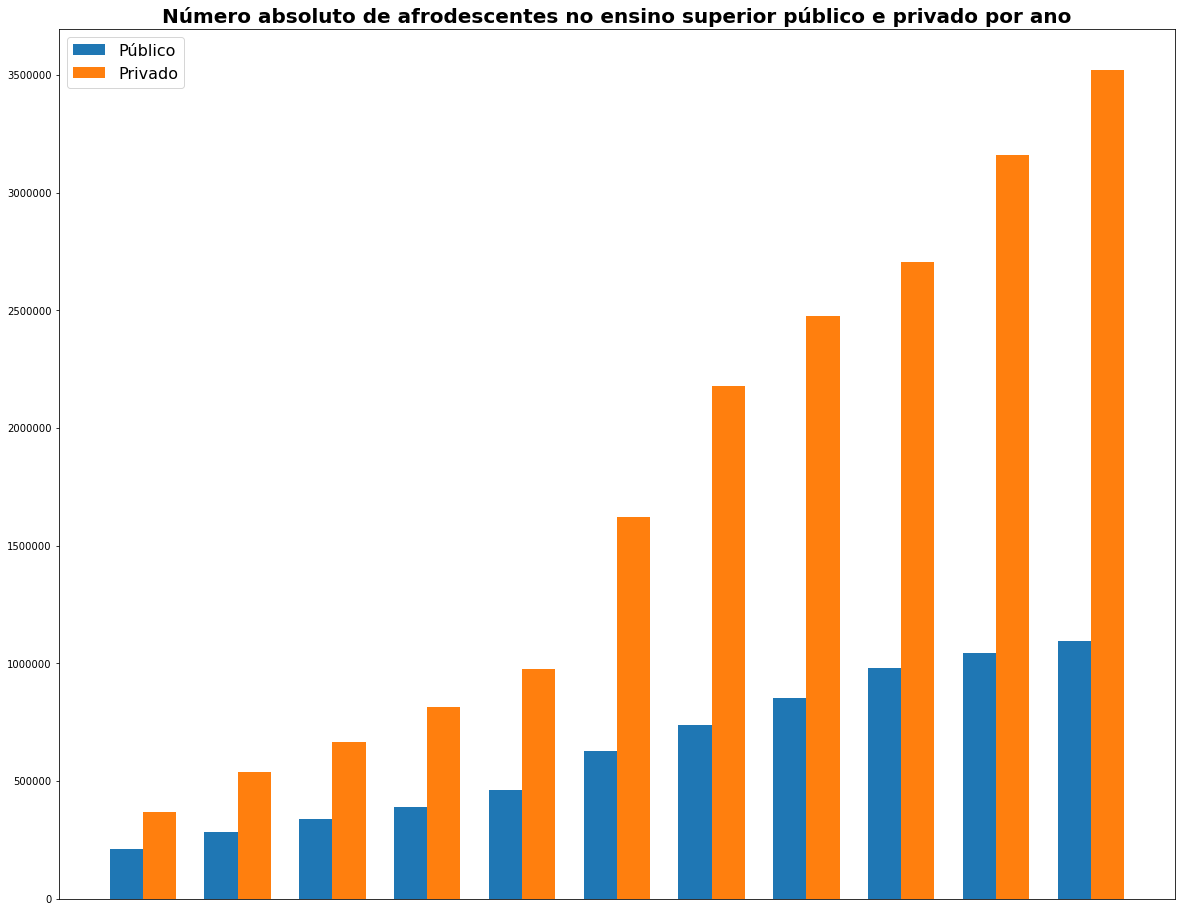

In [67]:
fig, ax = plt.subplots(figsize=(20,16))
plt.title("Número absoluto de afrodescentes no ensino superior público e privado por ano", fontsize= 20, fontweight='bold')
plt.xticks(anos, fontsize =12)
#plt.yticks(afro, fontsize=12)
ax.yaxis.get_major_formatter().set_scientific(False)
x = np.arange(len(anos))
width = 0.35 

rects1 = ax.bar(x - width/2, afro_pub, width, label='Público')
rects2 = ax.bar(x + width/2, afro_pri, width, label='Privado')


ax.legend(loc='upper left', fontsize = 16)




plt.show()

In [68]:
pd.DataFrame(list(zip(afro_pub,afro_pri,totais)) ,index=anos,columns =['afrodescendentes em universidades públicas', 'afrodescendentes em universidades privadas','total'] )

,afrodescendentes em universidades públicas,afrodescendentes em universidades privadas,total
2009,212737,368602,6982018
2010,283316,538592,8337219
2011,337967,666591,8961724
2012,388433,814146,9565483
2013,463959,977519,9929289
2014,628599,1620820,10793935
2015,738792,2179731,11187296
2016,852717,2475412,11449222
2017,981823,2706456,11589194
2018,1045183,3159323,12043993


In [69]:
pub = afro_pub[10]/afro_pub[0] * 100
pri = afro_pri[10]/afro_pri[0] * 100

In [70]:
pub,pri

(514.9720076902466, 954.7278636578205)

# Fica claro que há uma crescente tanto de alunos afrodescendentes em universidades privadas e públicas.
# Apesar disso, o crescimento relativo entre 2009 e 209 nas universidades privadas é muito maior do que nas públicas: 954% ante 514%

## Essa diferença poderia advir de estudantes que não terminam os cursos. Assim vamos analisar os alunos ingressantes:

In [71]:
df_2009_afro_ing = df_2009_afro[df_2009_afro['IN_INGRESSO'].isin([1])]
df_2010_afro_ing = df_2010_afro[df_2010_afro['IN_INGRESSO'].isin([1])]

In [72]:


df_2011_afro_ing = df_2011_afro[df_2011_afro['IN_INGRESSO_TOTAL'].isin([1])]

df_2012_afro_ing = df_2012_afro[df_2012_afro['IN_INGRESSO_TOTAL'].isin([1])]

df_2013_afro_ing = df_2013_afro[df_2013_afro['IN_INGRESSO_TOTAL'].isin([1])]

df_2014_afro_ing = df_2014_afro[df_2014_afro['IN_INGRESSO_TOTAL'].isin([1])]

df_2015_afro_ing = df_2015_afro[df_2015_afro['IN_INGRESSO_TOTAL'].isin([1])]

df_2016_afro_ing = df_2016_afro[df_2016_afro['IN_INGRESSO_TOTAL'].isin([1])]

df_2017_afro_ing = df_2017_afro[df_2017_afro['IN_INGRESSO_TOTAL'].isin([1])]
df_2018_afro_ing = df_2018_afro[df_2018_afro['IN_INGRESSO_TOTAL'].isin([1])]
df_2019_afro_ing = df_2019_afro[df_2019_afro['IN_INGRESSO_TOTAL'].isin([1])]

In [73]:
afro_ing = [len(df_2009_afro_ing.index),len(df_2010_afro_ing.index),len(df_2011_afro_ing.index),
            len(df_2012_afro_ing.index),len(df_2013_afro_ing.index),len(df_2014_afro_ing.index),
            len(df_2015_afro_ing.index),len(df_2016_afro_ing.index),
        len(df_2017_afro_ing.index),len(df_2018_afro_ing.index),len(df_2019_afro_ing.index)]

/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


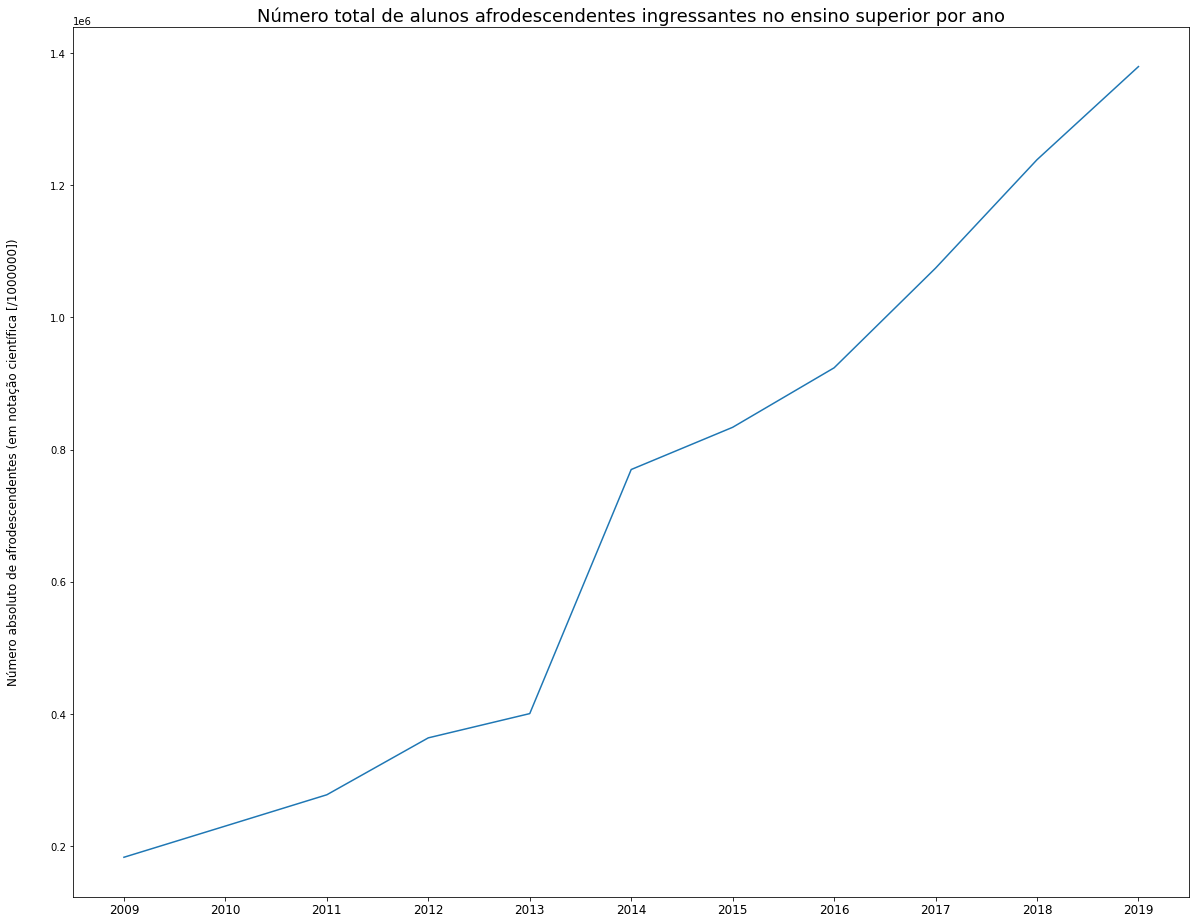

In [74]:
fig, ax = plt.subplots(figsize=(20,16))
plt.title("Número total de alunos afrodescendentes ingressantes no ensino superior por ano", fontsize= 18)

plt.xticks(anos, fontsize =12)
plt.ylabel("Número absoluto de afrodescendentes (em notação científica [/1000000])", fontsize=12, labelpad=30)
plt.plot(anos,afro_ing)
plt.show()




# Vemos então que há realmente uma maior entrada de alunos afrodescendentes no ensino superior, principalmente no setor privado. 
# Esse aumento de alunos no setor privado provavelmente é explicado pelas políticas públicas de financiamento estudantil.
# As duas principais são o FIES e o PROUNI, vamos verificar como essas políticas influenciam esse padrão

In [75]:
df_2009_afro_fies = df_2009_afro_pri[df_2009_afro_pri['IN_FIES'].isin([1])]
df_2010_afro_fies = df_2010_afro_pri[df_2010_afro_pri['IN_FIN_REEMB_FIES'].isin([1])]
df_2011_afro_fies = df_2011_afro_pri[df_2011_afro_pri['IN_FIN_REEMB_FIES'].isin([1])]
df_2012_afro_fies = df_2012_afro_pri[df_2012_afro_pri['IN_FIN_REEMB_FIES'].isin([1])]
df_2013_afro_fies = df_2013_afro_pri[df_2013_afro_pri['IN_FIN_REEMB_FIES'].isin([1])]
df_2014_afro_fies = df_2014_afro_pri[df_2014_afro_pri['IN_FIN_REEMB_FIES'].isin([1])]
df_2015_afro_fies = df_2015_afro_pri[df_2015_afro_pri['IN_FIN_REEMB_FIES'].isin([1])]
df_2016_afro_fies = df_2016_afro_pri[df_2016_afro_pri['IN_FIN_REEMB_FIES'].isin([1])]
df_2017_afro_fies = df_2017_afro_pri[df_2017_afro_pri['IN_FIN_REEMB_FIES'].isin([1])]
df_2018_afro_fies = df_2018_afro_pri[df_2018_afro_pri['IN_FIN_REEMB_FIES'].isin([1])]
df_2019_afro_fies = df_2019_afro_pri[df_2019_afro_pri['IN_FIN_REEMB_FIES'].isin([1])]

In [76]:
afro_fies = [len(df_2009_afro_fies.index),len(df_2010_afro_fies.index),len(df_2011_afro_fies.index),
            len(df_2012_afro_fies.index),len(df_2013_afro_fies.index),len(df_2014_afro_fies.index),
            len(df_2015_afro_fies.index),len(df_2016_afro_fies.index),
        len(df_2017_afro_fies.index),len(df_2018_afro_fies.index),len(df_2019_afro_fies.index)]

/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


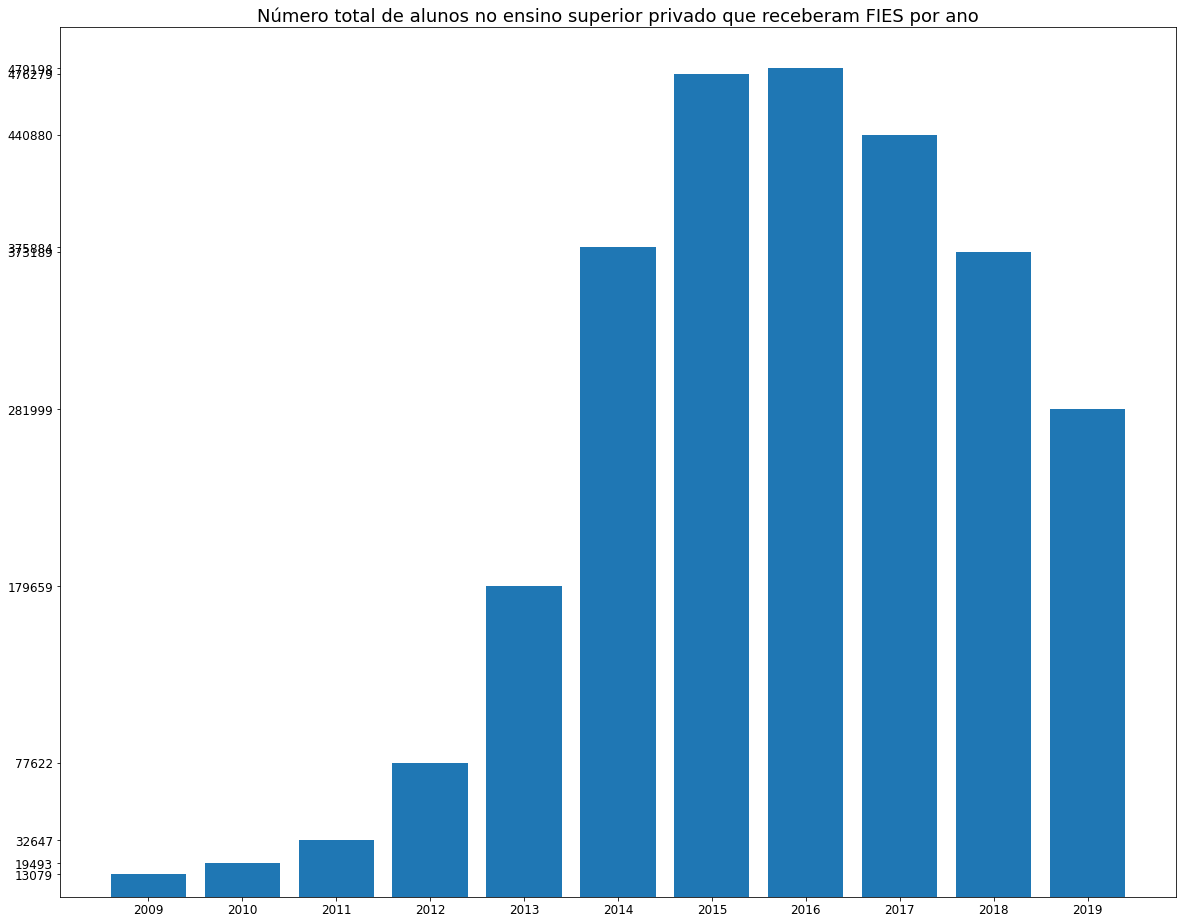

In [77]:
fig, ax = plt.subplots(figsize=(20,16))
plt.title("Número total de alunos no ensino superior privado que receberam FIES por ano", fontsize= 18)
plt.xticks(anos, fontsize =12)
plt.yticks(afro_fies, fontsize=12)
plt.bar(anos,afro_fies)
plt.show()

In [78]:
df_2009_afro_pro = df_2009_afro_pri[df_2009_afro_pri['IN_PROUNI_INTEGRAL'].isin([1]) | df_2009_afro_pri['IN_PROUNI_PARCIAL'].isin([1])]
df_2010_afro_pro = df_2010_afro_pri[df_2010_afro_pri['IN_FIN_NAOREEMB_PROUNI_INTEGR'].isin([1]) | df_2010_afro_pri['IN_FIN_NAOREEMB_PROUNI_PARCIAL'].isin([1])]
df_2011_afro_pro = df_2011_afro_pri[df_2011_afro_pri['IN_FIN_NAOREEMB_PROUNI_INTEGR'].isin([1]) | df_2011_afro_pri['IN_FIN_NAOREEMB_PROUNI_PARCIAL'].isin([1])]
df_2012_afro_pro = df_2012_afro_pri[df_2012_afro_pri['IN_FIN_NAOREEMB_PROUNI_INTEGR'].isin([1]) | df_2012_afro_pri['IN_FIN_NAOREEMB_PROUNI_PARCIAL'].isin([1])]
df_2013_afro_pro = df_2013_afro_pri[df_2013_afro_pri['IN_FIN_NAOREEMB_PROUNI_INTEGR'].isin([1]) | df_2013_afro_pri['IN_FIN_NAOREEMB_PROUNI_PARCIAL'].isin([1])]
df_2014_afro_pro = df_2014_afro_pri[df_2014_afro_pri['IN_FIN_NAOREEMB_PROUNI_INTEGR'].isin([1]) | df_2014_afro_pri['IN_FIN_NAOREEMB_PROUNI_PARCIAL'].isin([1])]
df_2015_afro_pro = df_2015_afro_pri[df_2015_afro_pri['IN_FIN_NAOREEMB_PROUNI_INTEGR'].isin([1]) | df_2015_afro_pri['IN_FIN_NAOREEMB_PROUNI_PARCIAL'].isin([1])]
df_2016_afro_pro = df_2016_afro_pri[df_2016_afro_pri['IN_FIN_NAOREEMB_PROUNI_INTEGR'].isin([1]) | df_2016_afro_pri['IN_FIN_NAOREEMB_PROUNI_PARCIAL'].isin([1])]
df_2017_afro_pro = df_2017_afro_pri[df_2017_afro_pri['IN_FIN_NAOREEMB_PROUNI_INTEGR'].isin([1]) | df_2017_afro_pri['IN_FIN_NAOREEMB_PROUNI_PARCIAL'].isin([1])]
df_2018_afro_pro = df_2018_afro_pri[df_2018_afro_pri['IN_FIN_NAOREEMB_PROUNI_INTEGR'].isin([1]) | df_2018_afro_pri['IN_FIN_NAOREEMB_PROUNI_PARCIAL'].isin([1])]
df_2019_afro_pro = df_2019_afro_pri[df_2019_afro_pri['IN_FIN_NAOREEMB_PROUNI_INTEGR'].isin([1]) | df_2019_afro_pri['IN_FIN_NAOREEMB_PROUNI_PARCIAL'].isin([1])]

In [79]:
afro_pro = [len(df_2009_afro_pro.index),len(df_2010_afro_pro.index),len(df_2011_afro_pro.index),
            len(df_2012_afro_pro.index),len(df_2013_afro_pro.index),len(df_2014_afro_pro.index),
            len(df_2015_afro_pro.index),len(df_2016_afro_pro.index),
        len(df_2017_afro_pro.index),len(df_2018_afro_pro.index),len(df_2019_afro_pro.index)]

/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


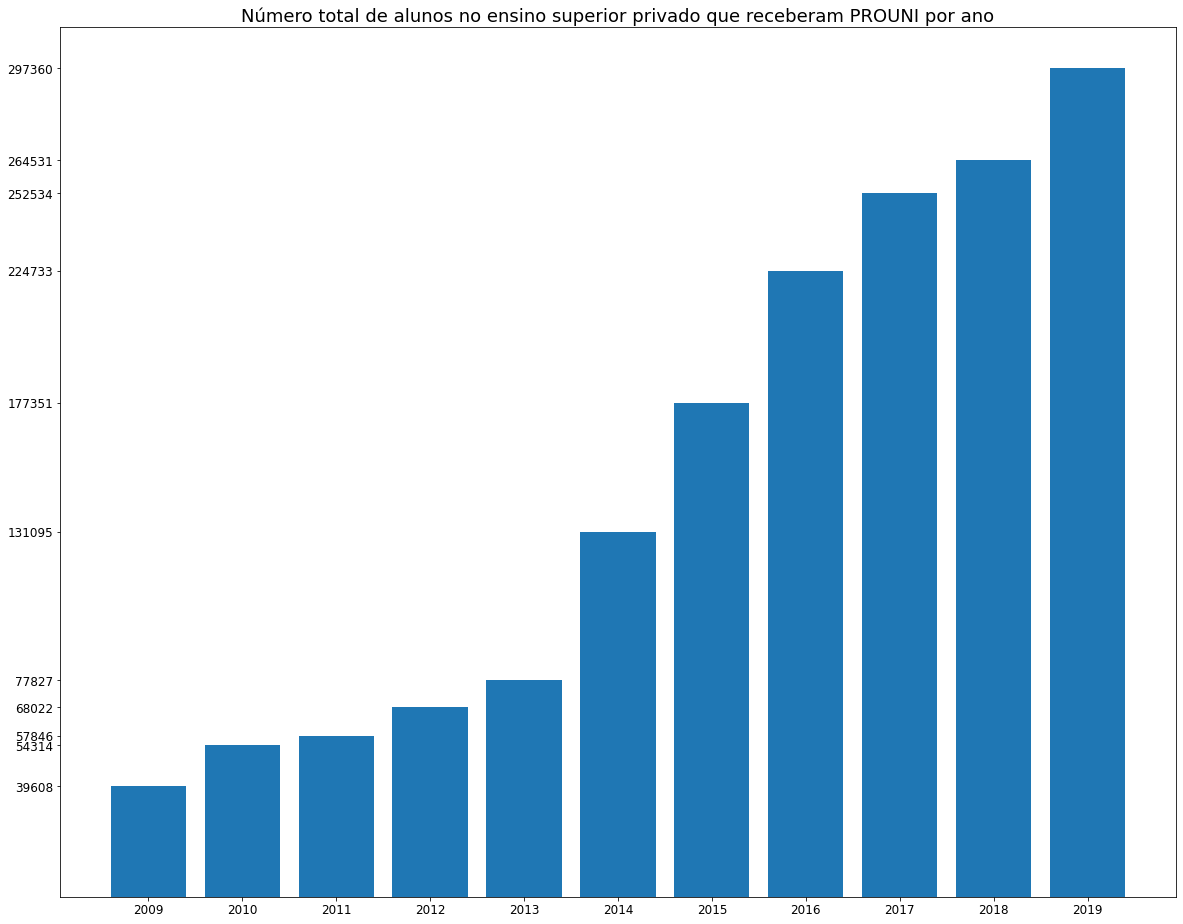

In [80]:
fig, ax = plt.subplots(figsize=(20,16))
plt.title("Número total de alunos no ensino superior privado que receberam PROUNI por ano", fontsize= 18)
plt.xticks(anos, fontsize =12)
plt.yticks(afro_pro, fontsize=12)
plt.bar(anos,afro_pro)
plt.show()

In [81]:
dif = [(a - b) for a,b in zip(afro_fies,afro_pro)]

In [82]:
pd.DataFrame(list(zip(afro_fies,afro_pro,dif)) ,index=anos,columns =['afrodescendentes com FIES', 'afrodescendentes com PROUNI','diferenca'] )

,afrodescendentes com FIES,afrodescendentes com PROUNI,diferenca
2009,13079,39608,-26529
2010,19493,54314,-34821
2011,32647,57846,-25199
2012,77622,68022,9600
2013,179659,77827,101832
2014,375884,131095,244789
2015,476279,177351,298928
2016,479198,224733,254465
2017,440880,252534,188346
2018,373189,264531,108658


# O Aumento de estudantes afrodescendentes no setor privado claramente tem relação com o aumento dessas políticas públicas.

# Mas qual o percentual desses estudantes utilizam esses tipos de financiamento?

In [83]:
percentis = [((a+b)/c ) *100 for a,b,c in zip(afro_fies,afro_pro,afro_pri)]

In [84]:
pd.DataFrame(zip(percentis) ,index=anos,columns =['percentagem de afrodescendentes com FIES ou PROUNI'] )


,percentagem de afrodescendentes com FIES ou PROUNI
2009,14.293737
2010,13.703694
2011,13.575491
2012,17.889175
2013,26.340767
2014,31.279167
2015,29.986728
2016,28.436923
2017,25.620738
2018,20.185337


# Uma parte considerável dos afrodescendentes recebe algum desses financiamentos públicos.
# Mas a taxa varia entre 31% e 14 %. Qual é então a percentagem de alunos na rede privada que necessita de financiamento ?

In [85]:
df_2009_afro_fin = df_2009_afro_pri[df_2009_afro_pri['IN_FINANC_ESTUDANTIL'].isin([1])]
df_2010_afro_fin = df_2010_afro_pri[df_2010_afro_pri['IN_FINANC_ESTUDANTIL'].isin([1])] 
df_2011_afro_fin = df_2011_afro_pri[df_2011_afro_pri['IN_FINANC_ESTUDANTIL'].isin([1])] 
df_2012_afro_fin = df_2012_afro_pri[df_2012_afro_pri['IN_FINANC_ESTUDANTIL'].isin([1])] 
df_2013_afro_fin = df_2013_afro_pri[df_2013_afro_pri['IN_FINANC_ESTUDANTIL'].isin([1])] 
df_2014_afro_fin = df_2014_afro_pri[df_2014_afro_pri['IN_FINANC_ESTUDANTIL'].isin([1])] 
df_2015_afro_fin = df_2015_afro_pri[df_2015_afro_pri['IN_FINANC_ESTUDANTIL'].isin([1])] 
df_2016_afro_fin = df_2016_afro_pri[df_2016_afro_pri['IN_FINANC_ESTUDANTIL'].isin([1])] 
df_2017_afro_fin = df_2017_afro_pri[df_2017_afro_pri['IN_FINANCIAMENTO_ESTUDANTIL'].isin([1])] 
df_2018_afro_fin = df_2018_afro_pri[df_2018_afro_pri['IN_FINANCIAMENTO_ESTUDANTIL'].isin([1])] 
df_2019_afro_fin = df_2019_afro_pri[df_2019_afro_pri['IN_FINANCIAMENTO_ESTUDANTIL'].isin([1])] 

In [86]:
afro_fin = [len(df_2009_afro_fin.index),len(df_2010_afro_fin.index),len(df_2011_afro_fin.index),
            len(df_2012_afro_fin.index),len(df_2013_afro_fin.index),len(df_2014_afro_fin.index),
            len(df_2015_afro_fin.index),len(df_2016_afro_fin.index),
        len(df_2017_afro_fin.index),len(df_2018_afro_fin.index),len(df_2019_afro_fin.index)]

/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


In [87]:
percentis = [a/b *100 for a,b in zip(afro_fin,afro_pri)]

In [88]:
pd.DataFrame(zip(percentis) ,index=anos,columns =['percentagem de afrodescendentes com financiamento'] )


,percentagem de afrodescendentes com financiamento
2009,29.869073
2010,31.375327
2011,28.954486
2012,31.286158
2013,39.697029
2014,41.178169
2015,41.181458
2016,41.570535
2017,41.819560
2018,44.449428


# O percentual de afrodescendentes que recebe financiamento apresenta no geral uma tendência de alta, o que contrasta com a diminuição dos programas federais.
# Será que esses estudantes estão recebendo financiamento da própria universidade?

In [89]:
df_2009_afro_ies = df_2009_afro_pri[df_2009_afro_pri['IN_FINANC_IES'].isin([1])]
df_2010_afro_ies = df_2010_afro_pri[df_2010_afro_pri['IN_FIN_REEMB_PROG_IES'].isin([1])] 
df_2011_afro_ies = df_2011_afro_pri[df_2011_afro_pri['IN_FIN_REEMB_PROG_IES'].isin([1])] 
df_2012_afro_ies = df_2012_afro_pri[df_2012_afro_pri['IN_FIN_REEMB_PROG_IES'].isin([1])] 
df_2013_afro_ies = df_2013_afro_pri[df_2013_afro_pri['IN_FIN_REEMB_PROG_IES'].isin([1])] 
df_2014_afro_ies = df_2014_afro_pri[df_2014_afro_pri['IN_FIN_REEMB_PROG_IES'].isin([1])] 
df_2015_afro_ies = df_2015_afro_pri[df_2015_afro_pri['IN_FIN_REEMB_PROG_IES'].isin([1])] 
df_2016_afro_ies = df_2016_afro_pri[df_2016_afro_pri['IN_FIN_REEMB_PROG_IES'].isin([1])] 
df_2017_afro_ies = df_2017_afro_pri[df_2017_afro_pri['IN_FIN_REEMB_PROG_IES'].isin([1])] 
df_2018_afro_ies = df_2018_afro_pri[df_2018_afro_pri['IN_FIN_REEMB_PROG_IES'].isin([1])] 
df_2019_afro_ies = df_2019_afro_pri[df_2019_afro_pri['IN_FIN_REEMB_PROG_IES'].isin([1])] 

In [90]:
afro_ies = [len(df_2009_afro_ies.index),len(df_2010_afro_ies.index),len(df_2011_afro_ies.index),
            len(df_2012_afro_ies.index),len(df_2013_afro_ies.index),len(df_2014_afro_ies.index),
            len(df_2015_afro_ies.index),len(df_2016_afro_ies.index),
        len(df_2017_afro_ies.index),len(df_2018_afro_ies.index),len(df_2019_afro_ies.index)]

/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


In [184]:
percentis = [a/b *100 for a,b in zip(afro_ies,afro_pri)]

In [185]:
pd.DataFrame(zip(percentis) ,index=anos,columns =['percentagem de afrodescendentes com financiamento reembonsável da instituicao'] )


,percentagem de afrodescendentes com financiamento reembonsável da instituicao
2009,9.008090
2010,0.865219
2011,0.790590
2012,0.636495
2013,0.791800
2014,0.369998
2015,0.465975
2016,0.696005
2017,1.108608
2018,2.524528


In [186]:
df_2019_afro_pri.columns

Index(['NU_ANO_CENSO', 'CO_IES', 'TP_CATEGORIA_ADMINISTRATIVA',
       'TP_ORGANIZACAO_ACADEMICA', 'CO_CURSO', 'CO_CURSO_POLO', 'TP_TURNO',
       'TP_GRAU_ACADEMICO', 'TP_MODALIDADE_ENSINO', 'TP_NIVEL_ACADEMICO',
       'CO_CINE_ROTULO', 'ID_ALUNO', 'CO_ALUNO_CURSO', 'CO_ALUNO_CURSO_ORIGEM',
       'TP_COR_RACA', 'TP_SEXO', 'NU_ANO_NASCIMENTO', 'NU_MES_NASCIMENTO',
       'NU_DIA_NASCIMENTO', 'NU_IDADE', 'TP_NACIONALIDADE', 'CO_PAIS_ORIGEM',
       'CO_UF_NASCIMENTO', 'CO_MUNICIPIO_NASCIMENTO', 'IN_DEFICIENCIA',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_DEFICIENCIA_FISICA',
       'IN_DEFICIENCIA_INTELECTUAL', 'IN_DEFICIENCIA_MULTIPLA',
       'IN_DEFICIENCIA_SURDEZ', 'IN_DEFICIENCIA_SURDOCEGUEIRA',
       'IN_DEFICIENCIA_BAIXA_VISAO', 'IN_DEFICIENCIA_CEGUEIRA',
       'IN_DEFICIENCIA_SUPERDOTACAO', 'IN_TGD_AUTISMO',
       'IN_TGD_SINDROME_ASPERGER', 'IN_TGD_SINDROME_RETT',
       'IN_TGD_TRANSTOR_DESINTEGRATIVO', 'TP_SITUACAO',
       'QT_CARGA_HORARIA_TOTAL', 'QT_CARGA_HORARIA_INTEG', 

# Como o financiamento não reembonsável da instuição não explica o financiamento olharemos para o ano mais recente, 2019, para analisar a composição do financiamento.

In [104]:
financiamentos = ['IN_FIN_REEMB_FIES',
       'IN_FIN_REEMB_ESTADUAL', 'IN_FIN_REEMB_MUNICIPAL',
       'IN_FIN_REEMB_PROG_IES', 'IN_FIN_REEMB_ENT_EXTERNA',
       'IN_FIN_REEMB_OUTRA', 'IN_FIN_NAOREEMB_PROUNI_INTEGR',
       'IN_FIN_NAOREEMB_PROUNI_PARCIAL', 'IN_FIN_NAOREEMB_ESTADUAL',
       'IN_FIN_NAOREEMB_MUNICIPAL', 'IN_FIN_NAOREEMB_PROG_IES',
       'IN_FIN_NAOREEMB_ENT_EXTERNA', 'IN_FIN_NAOREEMB_OUTRA']

In [113]:
totais = []
for i in financiamentos:
    totais.append(df_2019_afro_pri[i].compute().sum())

/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10)

In [187]:
percentis = []
for i in totais :
    percentis.append(i/sum(totais)*100)

In [188]:
percentis

[16.016646011557018,
 0.1166038683177123,
 0.1473309471096667,
 7.628153501353468,
 0.7004183653648457,
 0.0,
 12.534262680741676,
 4.369549635307628,
 0.6745758129612611,
 0.44710455499124757,
 53.92829515261873,
 3.437059469676747,
 0.0]

In [189]:
labels = ['FIES','REEMB_ESTADUAL', 'REEMB_MUNICIPAL','REEMB_IES', 'REEMB_EXTERNA','REEMB_OUTRA', 'PROUNI_INTEGR',
'PROUNI_PARCIAL','NAO_REEMB_ESTADUAL','NAO_REEMB_MUNICIPAL', 'NAO_REEMB_IES','NAO_REEMB_EXTERNA', 'NAO_REEMB_OUTRA']


In [190]:
df = pd.DataFrame(zip(percentis) ,index=labels,columns=['Percentual por tipo de financiamento'] )

In [191]:
df

,Percentual por tipo de financiamento
FIES,16.016646
REEMB_ESTADUAL,0.116604
REEMB_MUNICIPAL,0.147331
REEMB_IES,7.628154
REEMB_EXTERNA,0.700418
REEMB_OUTRA,0.000000
PROUNI_INTEGR,12.534263
PROUNI_PARCIAL,4.369550
NAO_REEMB_ESTADUAL,0.674576
NAO_REEMB_MUNICIPAL,0.447105


# Percebemos então que o grande financiador em 2019 da educação privada de afrodescendentes são as próprias instituições de ensino, perfazendo mais de 60% do total.

# Já vimos como o ensino privado se comporta. Agora vamos analisar o impacto de políticas de cotas.

## Nesse aspecto é importante salientar que a lei de cotas de 2012 estabelece que apenas 50% das vagas serão fornecidas a estudantes que completaram o ensino médio em rede pública (excluindo das cotas obrigatórias por lei os estudantes do ensino privado) e que essas cotas seriam estabelecidas de acordo com a composição racial da unidade federativa e de maneira gradual depois da sua promulgação valendo apenas para instituições vinculadas ao nível federal ( http://www.planalto.gov.br/ccivil_03/_ato2011-2014/2012/lei/l12711.htm).

## Portanto temos questões como temporalidade, configuração racial específica da UF, existência de instituições não federais. Todos esses aspectos poderiam ser analisados em separado, garantindo um filtro mais local. Mas, como o intuito aqui é uma análise macro, deixarei de lado essas questões. Dessa perspectiva, será possível averiguar como a política pública de cotas influenciou o sistema como um todo ao longo dos anos, incluindo um período anterior à lei e um período de adaptação, bem como poderemos ver que se o aumento no ingresso de afrodescendentes após o período de adaptação significaria a expansão das cotas para instituições não federais.

In [193]:
df_2009_afro_cota = df_2009_afro_pub[df_2009_afro_pub['IN_RESERVA_ETNICO'].isin([1])]
df_2010_afro_cota = df_2010_afro_pub[df_2010_afro_pub['IN_RESERVA_ETNICO'].isin([1])] 
df_2011_afro_cota = df_2011_afro_pub[df_2011_afro_pub['IN_RESERVA_ETNICO'].isin([1])] 
df_2012_afro_cota = df_2012_afro_pub[df_2012_afro_pub['IN_RESERVA_ETNICO'].isin([1])] 
df_2013_afro_cota = df_2013_afro_pub[df_2013_afro_pub['IN_RESERVA_ETNICO'].isin([1])] 
df_2014_afro_cota = df_2014_afro_pub[df_2014_afro_pub['IN_RESERVA_ETNICO'].isin([1])] 
df_2015_afro_cota = df_2015_afro_pub[df_2015_afro_pub['IN_RESERVA_ETNICO'].isin([1])] 
df_2016_afro_cota = df_2016_afro_pub[df_2016_afro_pub['IN_RESERVA_ETNICO'].isin([1])] 
df_2017_afro_cota = df_2017_afro_pub[df_2017_afro_pub['IN_RESERVA_ETNICO'].isin([1])] 
df_2018_afro_cota = df_2018_afro_pub[df_2018_afro_pub['IN_RESERVA_ETNICO'].isin([1])] 
df_2019_afro_cota = df_2019_afro_pub[df_2019_afro_pub['IN_RESERVA_ETNICO'].isin([1])] 

In [194]:
afro_cota = [len(df_2009_afro_cota.index),len(df_2010_afro_cota.index),len(df_2011_afro_cota.index),
            len(df_2012_afro_cota.index),len(df_2013_afro_cota.index),len(df_2014_afro_cota.index),
            len(df_2015_afro_cota.index),len(df_2016_afro_cota.index),
        len(df_2017_afro_cota.index),len(df_2018_afro_cota.index),len(df_2019_afro_cota.index)]

/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (13) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))
/home/leandro/anaconda3/lib/python3.8/site-packages/dask/core.py:121: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  return func(*(_execute_task(a, cache) for a in args))


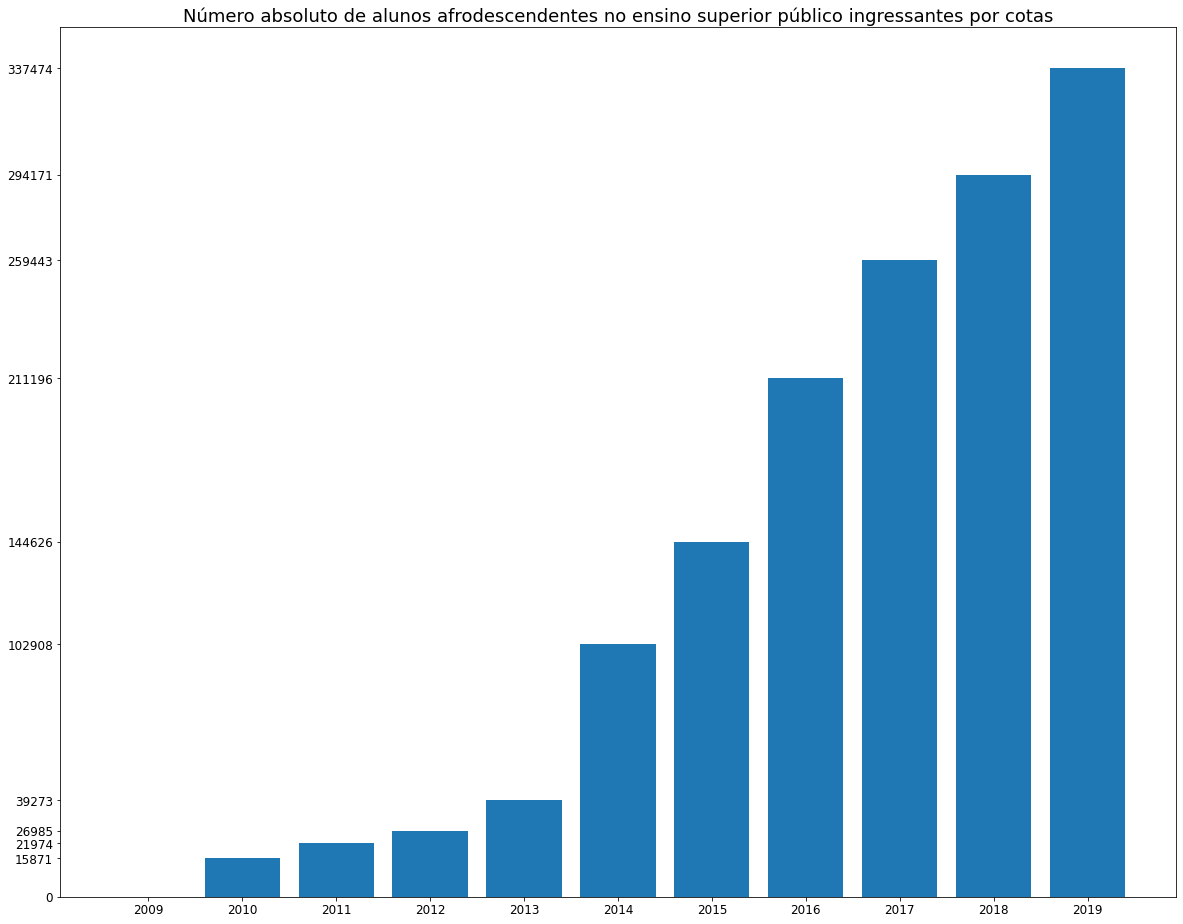

In [195]:
fig, ax = plt.subplots(figsize=(20,16))
plt.title("Número absoluto de alunos afrodescendentes no ensino superior público ingressantes por cotas", fontsize= 18)
plt.xticks(anos, fontsize =12)
plt.yticks(afro_cota, fontsize=12)
plt.bar(anos,afro_cota)
plt.show()

In [202]:
percentis = [(a/b)*100 for a,b in zip(afro_cota,afro_pub)]

In [203]:
pd.DataFrame(zip(percentis) ,index=anos,columns =['percentagem de afrodescendentes cotistas'] )

,percentagem de afrodescendentes cotistas
2009,0.000000
2010,5.601872
2011,6.501818
2012,6.947144
2013,8.464757
2014,16.371009
2015,19.576011
2016,24.767420
2017,26.424620
2018,28.145406


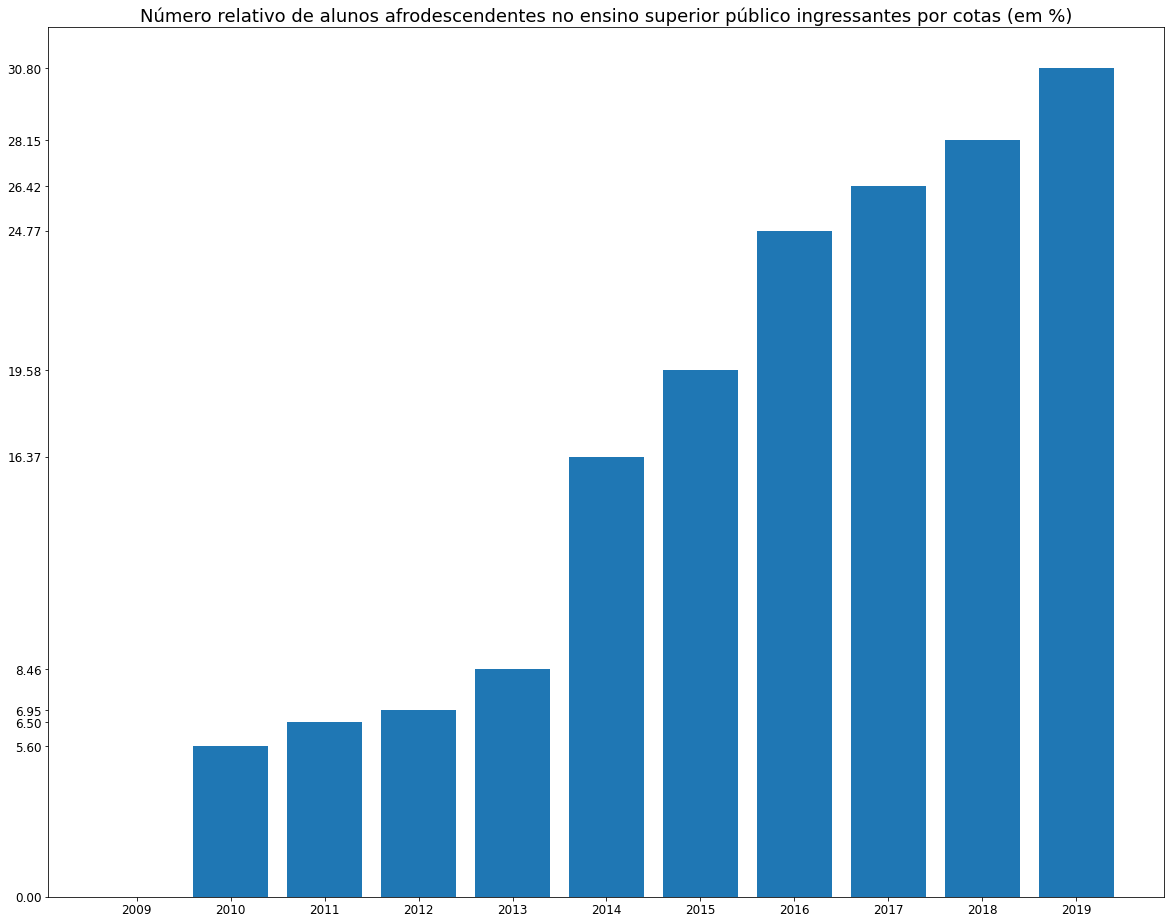

In [206]:
fig, ax = plt.subplots(figsize=(20,16))
plt.title("Número relativo de alunos afrodescendentes no ensino superior público ingressantes por cotas (em %)", fontsize= 18)
plt.xticks(anos, fontsize =12)
plt.yticks(percentis, fontsize=12)
plt.bar(anos,percentis)
plt.show()

# Os pressupostos são confirmados pelos dados.

## Há durante todo o período tanto o aumento bruto quanto relativo de alunos afrodescendentes ingressantes em instituições de ensino públicas por meio de cotas.

## Esse aumento se acentua a partir de 2013 (ano de efetiva entrada em vigor da lei de cotas) e se acelera fortemente a partir de 2014.

## Interessante notar a ausência de cotitas no ano de 2009, os motivos não são claros. Também a análise demonstrou que no ensino privado não há praticamente cotas raciais, com raras exeções que não influenciam o cenário

## Também é preciso salientar que apesar desse avanço ainda temos uma distorção em relação à composição racial brasileira que de acordo com o IBGE é de aproximadamente 55% (https://www.ibge.gov.br/estatisticas/sociais/populacao/25844-desigualdades-sociais-por-cor-ou-raca.html?=&t=resultados).

## Esse cenário demonstra que ainda existem barreiras de acesso no ensino médio que se refletem no ensino superior.

## Outros fatores poderiam ser alvo de outras análises. Destaco: as relações entre as composições raciais das UFs e suas respectivas proporções de afrodescentes nas instituições federais, a 'migração' de alunos de UFs com melhores consições educacionais para instituições em outras UFs, a distorção entre a composição racial da UF e de seus estudantes.